In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [33]:
data_jabar = pd.read_csv("D:/SM 2/PERMODELAN STATISTIK TERAPAN/Dataset Provinsi Jawa Barat.csv", sep=';')
data_jabar

,Kabupaten/Kota,Persentase Penduduk Miskin (2021),Persentase Penduduk yang Mempunyai Keluhan Kesehatan (2021),Jumlah Sekolah Menengah Atas (2021),Jumlah Sekolah Menengah Kejuruan (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sumber Air Minum Layak (2021),Jumlah KPM BANSOS Pangan (2021),Jumlah Anggaran BANSOS Pangan (2021),Tingkat Pengangguran Terbuka (2021),Tingkat Partisipasi Angkatan Kerja (2021)
0,Bogor,8.13,32.94,192,358,63.91,91.83,1714830,188631300000,12.22,62.55
1,Sukabumi,7.70,28.97,83,163,64.35,81.34,161045,17714950000,9.51,64.93
2,Cianjur,11.18,40.24,95,186,58.52,86.25,1899590,208954900000,9.32,67.98
3,Bandung,7.15,28.69,109,139,64.51,99.07,166430,18307300000,8.32,65.12
4,Garut,10.65,37.41,127,140,43.73,77.35,169196,18611560000,8.68,62.76
5,Tasikmalaya,11.15,37.13,71,141,49.35,85.26,1255550,138110500000,6.16,68.18
6,Ciamis,7.97,39.20,31,142,66.59,90.12,72930,8022300000,5.06,69.83
7,Kuningan,13.10,42.23,27,143,80.98,94.40,820820,90290200000,11.68,63.82
8,Cirebon,12.30,45.40,49,144,83.41,96.54,164402,18084220000,10.38,64.49
9,Majalengka,12.33,34.53,22,145,80.59,96.80,102216,11243760000,5.71,67.63


Dapat diketahui bahwa tidak ada missing value pada dataset dengan indikasi jumlah non-null setiap variabel sama yaitu 28

In [34]:
data_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Kabupaten/Kota                                                                      27 non-null     object 
 1   Persentase Penduduk Miskin (2021)                                                   27 non-null     float64
 2   Persentase Penduduk yang Mempunyai Keluhan Kesehatan (2021)                         27 non-null     float64
 3   Jumlah Sekolah Menengah Atas (2021)                                                 27 non-null     int64  
 4   Jumlah Sekolah Menengah Kejuruan (2021)                                             27 non-null     int64  
 5   Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak (2021)          27 non-null     f

menghapus kolom dengan tipe data string untuk memudahkan standarisasi

In [35]:
data_jabar_baru = data_jabar.drop(['Kabupaten/Kota'], axis=1)

In [36]:
scaler = StandardScaler()
data_jabar_scaled = scaler.fit_transform(data_jabar_baru)
data_jabar_scaled

array([[-2.95706368e-01, -2.06780808e-01,  2.86011913e+00,
         4.95064156e+00, -5.45933008e-01, -2.30044480e-01,
         2.62542089e+00,  2.62542089e+00,  1.18022470e+00,
        -7.06526855e-01],
       [-4.47146638e-01, -8.39338880e-01,  4.66792260e-01,
         7.59215650e-02, -5.18253079e-01, -1.81033791e+00,
        -3.84731770e-01, -3.84731770e-01,  4.55900753e-02,
        -2.97019340e-02],
       [ 7.78462992e-01,  9.56361238e-01,  7.30277786e-01,
         6.50888539e-01, -8.85012136e-01, -1.07065814e+00,
         2.98335703e+00,  2.98335703e+00, -3.39599541e-02,
         8.37657733e-01],
       [-6.40849309e-01, -8.83952548e-01,  1.03767757e+00,
        -5.24043973e-01, -5.08187650e-01,  8.60644215e-01,
        -3.74299392e-01, -3.74299392e-01, -4.52644319e-01,
         2.43303076e-02],
       [ 5.91804054e-01,  5.05444527e-01,  1.43290586e+00,
        -4.99045409e-01, -1.81543520e+00, -2.41142187e+00,
        -3.68940812e-01, -3.68940812e-01, -3.01917948e-01,
        -6.

Menentukan jumlah cluster dengan menggunakan elbow curve wcss

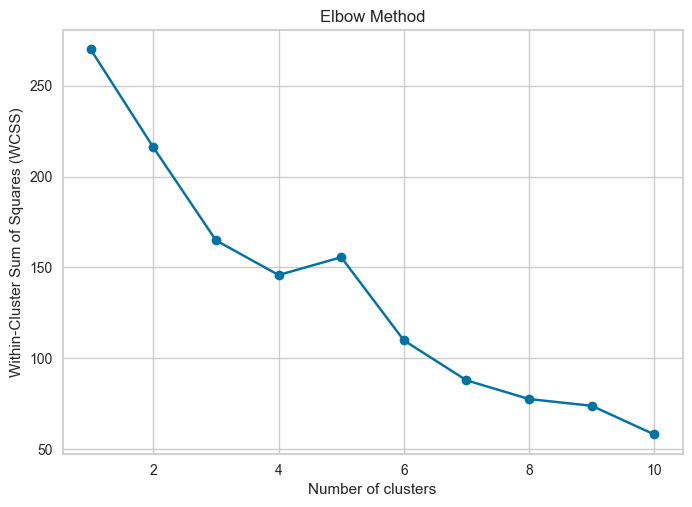

In [37]:
wcss = []

# Define range of clusters to test
k_range = range(1, 11)

# Calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_jabar_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**a. Menentukan jumlah cluster optimal menggunakan SILHOUETTE SCORE**</br>
Menggunakan pendekatan silhouette_score didapati n_cluster atau k = 2</br>
NB: Kelemahan dari silhouette score adalah nilai dari setiap n_cluster tidak konsisten setiap dilakukannya proses komputasi

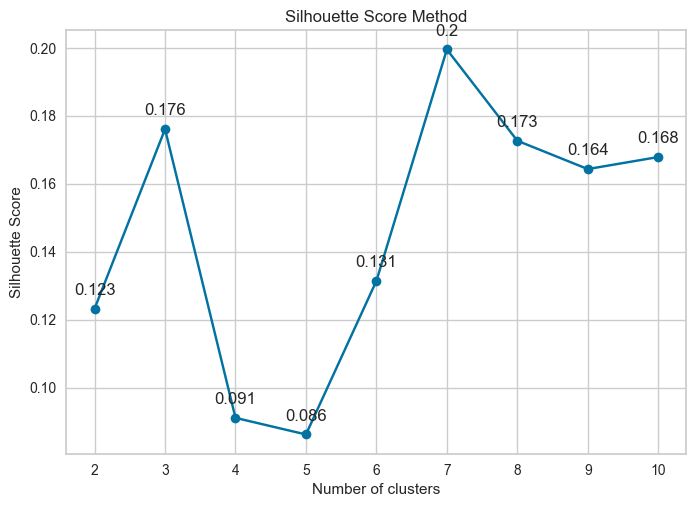

In [38]:
silhouette_scores = []

# Calculate silhouette score for each k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_jabar_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_jabar_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    # Add annotation for silhouette score
    plt.annotate(round(silhouette_avg, 3), (k, silhouette_avg), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**b. Menentukan jumlah cluster optimal menggunakan KElbowVisualizer**</br>
Menggunakan pendekatan KElbowVisualizer didapati n_cluster atau k = 3 dengan score (163.659)</br>
NB: Kelebihan dari KElbowVisualizer adalah lebih konsisten atau hasil yang diberikan selalu tetap berapapun maximum iterasinya

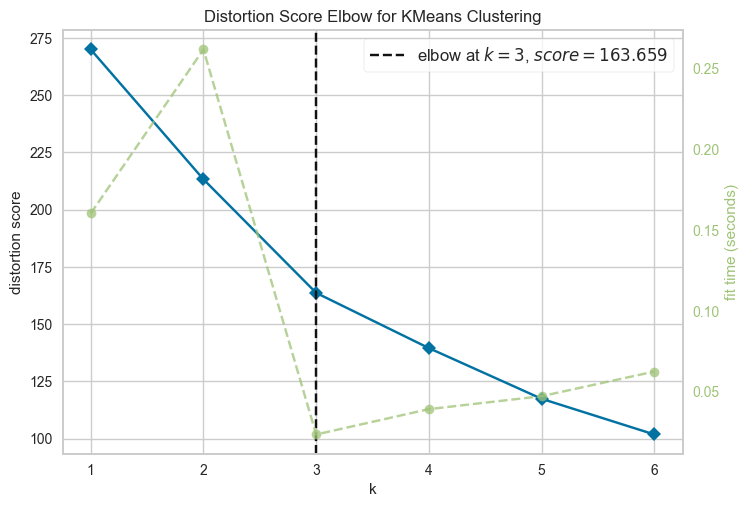

In [39]:
# Instantiate the KMeans model and visualizer
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,7))

# Fit the data and visualize
visualizer.fit(data_jabar_scaled)
visualizer.show()
plt.show()

a. Melakukan clustering analysis dengan n_cluster = 2 (berdasarkan pendekatan silhouette_score)</br>

In [40]:
k = 2
kmeans = KMeans(n_clusters=k)
# Melatih model kmeans menggunakan dataframe
kmeans.fit(data_jabar_scaled)
# Mendapatkan hasil clutering
Cluster2 = kmeans.labels_

Menentukan nilai centroid</br>

In [41]:
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)

Cluster Centers:
 [[ 0.54132396  0.77047096  0.62049215  0.65505497 -0.69649504 -1.09350636
   1.34577594  1.34577594  0.16421731 -0.17947552]
 [-0.15466399 -0.22013456 -0.17728347 -0.18715856  0.19899858  0.31243039
  -0.38450741 -0.38450741 -0.04691923  0.05127872]]


Menampilkan dataset dan kolom cluster</br>

In [42]:
data_jabar['Cluster2'] = Cluster2
sorted_data_jabar = data_jabar.sort_values(by='Cluster2')
sorted_data_jabar

,Kabupaten/Kota,Persentase Penduduk Miskin (2021),Persentase Penduduk yang Mempunyai Keluhan Kesehatan (2021),Jumlah Sekolah Menengah Atas (2021),Jumlah Sekolah Menengah Kejuruan (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sumber Air Minum Layak (2021),Jumlah KPM BANSOS Pangan (2021),Jumlah Anggaran BANSOS Pangan (2021),Tingkat Pengangguran Terbuka (2021),Tingkat Partisipasi Angkatan Kerja (2021),Cluster2
0,Bogor,8.13,32.94,192,358,63.91,91.83,1714830,188631300000,12.22,62.55,0
7,Kuningan,13.10,42.23,27,143,80.98,94.40,820820,90290200000,11.68,63.82,0
5,Tasikmalaya,11.15,37.13,71,141,49.35,85.26,1255550,138110500000,6.16,68.18,0
4,Garut,10.65,37.41,127,140,43.73,77.35,169196,18611560000,8.68,62.76,0
13,Purwakarta,8.83,44.49,28,149,72.61,81.50,465820,51240200000,10.70,61.13,0
2,Cianjur,11.18,40.24,95,186,58.52,86.25,1899590,208954900000,9.32,67.98,0
24,Kota Cimahi,5.35,31.29,16,160,78.67,97.93,15817,1739870000,13.07,61.79,1
23,Kota Depok,2.58,31.04,68,159,97.06,99.52,31989,3518790000,9.76,62.62,1
22,Kota Bekasi,4.74,30.65,109,158,97.54,100.00,60582,6664020000,10.88,64.76,1
21,Kota Cirebon,10.03,42.56,27,157,92.71,99.34,16202,1782220000,10.53,62.87,1


Menentukan komponen PCA dua dim</br>

In [43]:
pca = PCA(n_components = 2,random_state = 42)
pca_data_jabar2d= pd.DataFrame(pca.fit_transform(data_jabar_scaled), columns=(["PC1","PC2"]))
pca_data_jabar2d['Kabupaten/Kota'] = data_jabar['Kabupaten/Kota']
pca_data_jabar2d['Cluster2'] = Cluster2
pca_data_jabar2d

,PC1,PC2,Kabupaten/Kota,Cluster2
0,5.614495,-3.423012,Bogor,0
1,0.264643,-0.234764,Sukabumi,1
2,4.499115,0.811682,Cianjur,0
3,-0.602346,-0.839161,Bandung,1
4,1.094125,0.520150,Garut,0
5,2.698174,1.795322,Tasikmalaya,0
6,-0.535741,2.143422,Ciamis,1
7,0.697992,0.786679,Kuningan,0
8,-0.572774,1.012223,Cirebon,1
9,-0.970571,1.824066,Majalengka,1


Visualisasi clustering analysis dengan n_cluster = 2</br>

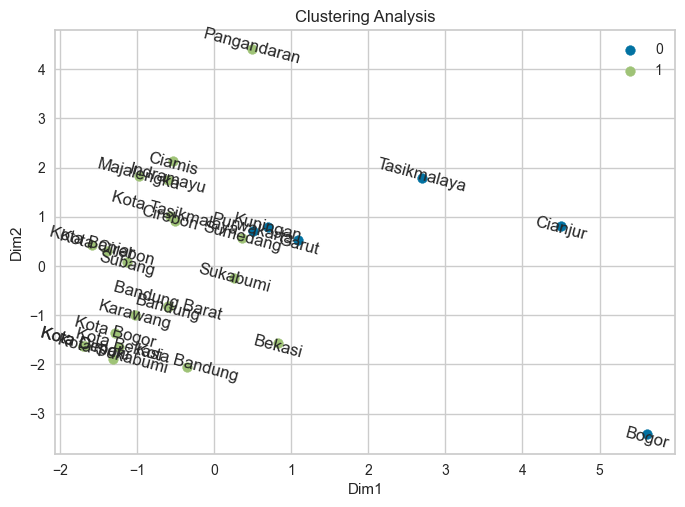

In [44]:
fig, ax = plt.subplots()
for Cluster2, d in pca_data_jabar2d.groupby('Cluster2'):
    ax.scatter(d['PC1'], d['PC2'], label=Cluster2)
    for i, txt in enumerate(d['Kabupaten/Kota']):
        ax.annotate(txt, (d['PC1'].iloc[i], d['PC2'].iloc[i]), xytext=(0, -10),
         textcoords='offset points', ha='center', rotation=-15)

plt.legend(loc='upper right')
plt.title('Clustering Analysis')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.grid(True)
plt.show()

Melakukan clustering analysis dengan n_cluster = 3 (berdasarkan pendekatan silhouette_score)</br>

In [45]:
k = 3
kmeans = KMeans(n_clusters=k)
# Melatih model kmeans menggunakan dataframe
kmeans.fit(data_jabar_scaled)
# Mendapatkan hasil clutering
Cluster3 = kmeans.labels_

Menentukan centroid</br>

In [46]:
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)

Cluster Centers:
 [[-0.82686791 -0.78081965  0.29712355 -0.14224772 -0.05981855  0.42554653
  -0.41524007 -0.41524007  0.59863406 -0.55347859]
 [ 0.58476032  0.39661905 -0.69913119 -0.23656049  0.48369744  0.18800264
  -0.35070149 -0.35070149 -0.75702785  0.71651176]
 [ 0.54132396  0.77047096  0.62049215  0.65505497 -0.69649504 -1.09350636
   1.34577594  1.34577594  0.16421731 -0.17947552]]


Menyertakan kolom cluster yang berisi clustering k=3 pada dataset</br>

In [47]:
data_jabar['Cluster3'] = Cluster3
sorted_data_jabar = data_jabar.sort_values(by='Cluster3')
sorted_data_jabar

,Kabupaten/Kota,Persentase Penduduk Miskin (2021),Persentase Penduduk yang Mempunyai Keluhan Kesehatan (2021),Jumlah Sekolah Menengah Atas (2021),Jumlah Sekolah Menengah Kejuruan (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak (2021),Persentase Rumah Tangga yang Memiliki Akses Terhadap Sumber Air Minum Layak (2021),Jumlah KPM BANSOS Pangan (2021),Jumlah Anggaran BANSOS Pangan (2021),Tingkat Pengangguran Terbuka (2021),Tingkat Partisipasi Angkatan Kerja (2021),Cluster2,Cluster3
20,Kota Bandung,4.37,31.37,139,156,48.90,99.51,51123,5623530000,11.46,65.31,1,0
1,Sukabumi,7.70,28.97,83,163,64.35,81.34,161045,17714950000,9.51,64.93,1,0
24,Kota Cimahi,5.35,31.29,16,160,78.67,97.93,15817,1739870000,13.07,61.79,1,0
3,Bandung,7.15,28.69,109,139,64.51,99.07,166430,18307300000,8.32,65.12,1,0
23,Kota Depok,2.58,31.04,68,159,97.06,99.52,31989,3518790000,9.76,62.62,1,0
22,Kota Bekasi,4.74,30.65,109,158,97.54,100.00,60582,6664020000,10.88,64.76,1,0
18,Kota Bogor,7.24,31.55,54,154,75.35,98.14,32713,3598430000,11.79,61.77,1,0
16,Bandung Barat,11.30,30.99,60,152,63.78,92.47,77975,8577250000,11.65,60.75,1,0
15,Bekasi,5.21,25.07,122,151,81.02,95.02,848910,93380100000,10.09,65.87,1,0
19,Kota Sukabumi,8.25,25.84,19,155,39.64,98.37,11215,1233650000,10.78,56.86,1,0


Menyertakan kolom cluster 3 pada dataframe komponen utama

In [48]:
pca_data_jabar2d['Cluster3'] = Cluster3
pca_data_jabar2d

,PC1,PC2,Kabupaten/Kota,Cluster2,Cluster3
0,5.614495,-3.423012,Bogor,0,2
1,0.264643,-0.234764,Sukabumi,1,0
2,4.499115,0.811682,Cianjur,0,2
3,-0.602346,-0.839161,Bandung,1,0
4,1.094125,0.520150,Garut,0,2
5,2.698174,1.795322,Tasikmalaya,0,2
6,-0.535741,2.143422,Ciamis,1,1
7,0.697992,0.786679,Kuningan,0,2
8,-0.572774,1.012223,Cirebon,1,1
9,-0.970571,1.824066,Majalengka,1,1


Visualisasi clustering analysis K=3</br>

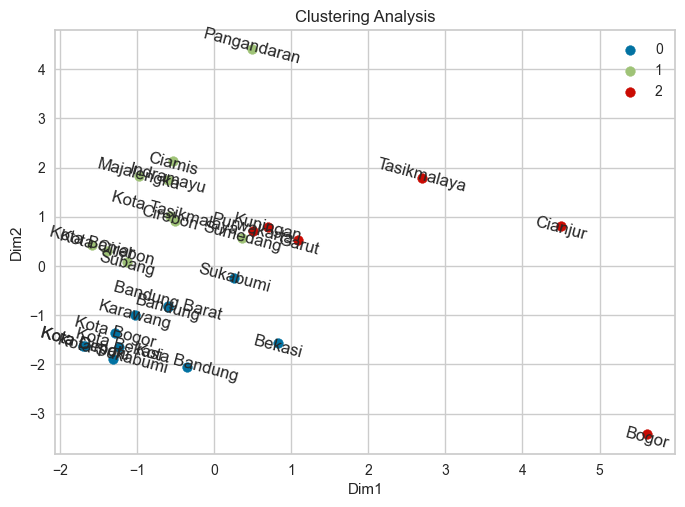

In [49]:
fig, ax = plt.subplots()
for Cluster3, d in pca_data_jabar2d.groupby('Cluster3'):
    ax.scatter(d['PC1'], d['PC2'], label=Cluster3)
    for i, txt in enumerate(d['Kabupaten/Kota']):
        ax.annotate(txt, (d['PC1'].iloc[i], d['PC2'].iloc[i]), xytext=(0, -10),
         textcoords='offset points', ha='center', rotation=-15)

plt.legend(loc='upper right')
plt.title('Clustering Analysis')
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.grid(True)
plt.show()